<a href="https://colab.research.google.com/github/rsethi21/na_for_systems_bio/blob/main/pten_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook serves as a tutorial a computational model of pten/pi3k signaling.
The instructions outline
- executing the computational model
- analyzing its output
- comparing the outputs to validation data
- evaluating a hypothesis that was not part of the 'training' data

***Code execution***:  
To run these commands on your local computer
* Create a copy of the simulation code
```
#git clone https://github.com/rsethi21/na_for_systems_bio/
git clone https://github.com/huskeypm/pten
```
* Execute code
```
python testing_atp.py -s atp_data/substrates_lps.csv -r atp_data/rates.csv -i atp_data/interactions.csv -p output/fitted_params.json -o /tmp/lps/
```

To run within jupyter notebook
* Check out a copy of the simulation code from a github repository
* Follow code blocks below

In [1]:
!git clone https://github.com/huskeypm/pten


Cloning into 'pten'...
remote: Enumerating objects: 868, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 868 (delta 5), reused 4 (delta 1), pack-reused 853
Receiving objects: 100% (868/868), 40.39 MiB | 16.46 MiB/s, done.
Resolving deltas: 100% (484/484), done.


* The code is passed inputs that contain information about kinetics of the modeled pathways, substrate concentrations etc


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
#sys.path.append("./na_for_systems_bio")
sys.path.append("./pten")
#import pten.user_src.testing_atp as tap
import pten.user_src.testing_pkh as tpkh

* Run code below

Note that the network is displayed below

*Extracted this code from the
testing_atp.py script. Merged into testing_pkh for the time being, but RS may want to put this elsewhere.*


In [6]:
fnames = tpkh.runSim(
    amtsAtp = [1.0,1.0],
    ranges = [[60,120]],
    amtsLps = [0.0,1.0]    # need to be same length as amtsAtp
)


LPS = 0
HDACi = 0
LY294-002 = 0
ATP = 0
d[AKT]/dt = k3[pAKT] - r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2]
d[pAKT]/dt = r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2] - k3[pAKT]
d[PTEN]/dt = k4[pPTEN] - r4[PTEN][GSK3B] + s2[LPS][pPTEN]
d[pPTEN]/dt = r4[PTEN][GSK3B] - k4[pPTEN] - s2[LPS][pPTEN]
d[PIP2]/dt = k2[PIP3] - r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)]
d[PIP3]/dt = r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)] - k2[PIP3]
d[PI3K]/dt = k1[PI3Ks] - r1[PI3K] + s3[Gio][PI3Ks] - s4[PI3K][LY294-002]
d[PI3Ks]/dt = r1[PI3K] - k1[PI3Ks] - s3[PI3Ks][Gio] + s4[LY294-002][PI3K]
d[GSK3B]/dt = k5[pGSK3B] - r5[GSK3B][pAKT] + s1[HDACi]
d[pGSK3B]/dt = r5[GSK3B][pAKT] - k5[pGSK3B]
d[TNFa]/dt = k6[PTEN] - r6[TNFa][pAKT]
d[Phagocytosis]/dt = k7[pAKT] - r7[Phagocytosis][PTEN]
d[P2Y12act]/dt = k8[P2Y12s] - r8[P2Y12act] + s5[ATP][P2Y12s]
d[P2Y12s]/dt = r8[P2Y12act] - k8[P2Y12s] - s5[ATP][P2Y12s]
d[Gio]/dt = k9[P2Y12act] - r9[Gio][Gio]



  0%|          | 0/2 [00:00<?, ?it/s]

0.0


 50%|█████     | 1/2 [00:01<00:01,  1.87s/it]

1.0


100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


* Load data and plot
we should have csv files for different run cases that are listed in fnames. If running simulator code within notebook, fnames is already population. If not, put the filenames in below

In [ ]:
#fnames=['atp_1.0_[60, 120]_lps_0.0.csv', 'atp_1.0_[60, 120]_lps_1.0.csv']

In [7]:
import pandas as pd
class empty:pass
conds = dict()

cond = empty()
fname = fnames[0]  # reading fname associated with only using atp
cond.df = pd.read_csv(fname)
conds['atp']=cond

cond = empty()
fname = fnames[1]  # reading fname associated with atp+lps
cond.df = pd.read_csv(fname)
conds['lps+atp']=cond



Here we plot the pAkt as a function of time

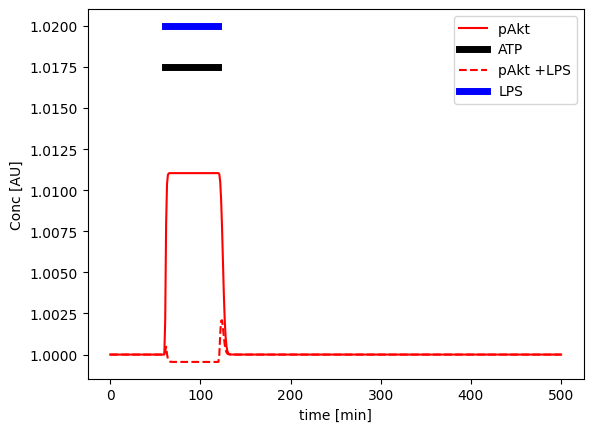

In [8]:
cond = conds['atp']
df = cond.df
#plt.plot( df['LPS'] )
tpkh.Plotter(df,'ATP')


cond = conds['lps+atp']
df = cond.df
#plt.plot( df['LPS'] )
tpkh.Plotter(df,'LPS',tag='+LPS',linestyle='r--',substratePos=.02)



Using hypothetical data here.
In general, these should be populated with actual data from the Wang paper and EMily's experiments

In [9]:
import numpy as np
import matplotlib.pylab as plt

In [10]:
# Emily data (WB)
wATP = [[0.0,60],  # intensity of 0.6 after 60 min. 60-120 is used here since we start ATP at 60 for the numerical model
        [0.2,65],
        [0.2,70],
        [0.5,90],
        [1.0,120]]
wATP = np.asarray(wATP)

# this is HYPOTHETICAL,
wangATP = [[0.0,60],  # intensity of 0.6 after 60 min. 60-120 is used here since we start ATP at 60 for the numerical model
           [1.0,120]]
wangATP = np.asarray(wangATP)



Plot predicted data versus actual data measured by Emily and Wang. *Note that the predictions increase steady-state much faster than was observed by Emily*

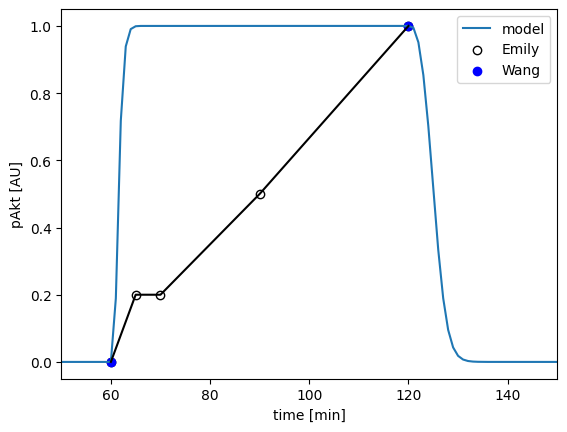

In [11]:
cond = conds['atp']
df = cond.df
pAkt = np.asarray( df['pAKT'] )
npAkt = pAkt - np.min(pAkt)
npAkt /= np.max(npAkt)


ts = np.arange( np.shape(pAkt) [0])

plt.plot(ts,npAkt,label='model')
plt.scatter(wATP[:,1],wATP[:,0],facecolor='white',edgecolor='black',label='Emily')
plt.plot(wATP[:,1],wATP[:,0],'k-')
plt.scatter(wangATP[:,1],wangATP[:,0],facecolor='blue',label='Wang')
plt.xlim([50,150])
plt.ylabel('pAkt [AU]')
plt.xlabel('time [min]')
plt.legend(loc=0)

1. P2Y12 expression decreases with LPS treatment [17115040]
(coincidentally, it is upregulated in M2 states [doi.org/10.1212/NXI.0000000000000080]). How might the Akt phosphorylation status change following prolonged LPS treatment (assuming normal expression of all other proteins in the model, so in principle this could be modeled by applying a P2Y12 antagonist)?

2. GSK3B activity is suppressed following phoshorylation (Ser) by Akt, as well as PKA [10.1038/s41598-017-09239-5]. PKA can be activated by isoproternol [/10.1016/0197-0186(95)00139-5] or other beta adrenergic receptor agonists. How might acute isoproternol treatment impact phagocytosis?


For 1, first review the equations that govern P2Y12 dependent activation. We see that
```
d[P2Y12act]/dt = k8[P2Y12s]....
```
reflects the rate of P2Y12 activation as a function of the inactive(?) P2Y12s concentration. We can reduce the amount of P2Y12act by either decreasing P2Y12s or k8. k8 is a tad easier. We could also increase the r8 term to the same effect

In [ ]:
# get current data
path="pten/input/input_atp_data/"
rates = tpkh.parse_rates(path+"/rates.csv")
#paramName = 'k8' # contains ATP dependent term

paramName = 's5' # contains ATP dependent term
#paramName = 'k1' #  <-- ran this to make sure that we could block PI3K activation

paramIdx = -1
for i,rate in enumerate(rates):
  if rate.identifier == paramName:
    print("%s %f"%(
      rate.identifier,
      rate.value))
    paramIdx = i

# condition
amtsAtp=[1.]
amtsLps=[0.]

# run the simulations
rescaledValue = 0.1 * rates[paramIdx].value
newParams={ paramName: rescaledValue,
           # 'k8': 0. #, 'r8':0.
           }

ranges=[[60,120]]
ctl = tpkh.runSim(tag = 'ctl',amtsAtp=amtsAtp,ranges=ranges,amtsLps=amtsLps, norm=False) # will use default parameters
decrP2Y12  = tpkh.runSim(tag='cond',params=newParams,ranges=ranges,amtsAtp=amtsAtp,amtsLps=amtsLps, norm=False)

In [109]:
def normalize(arr, min=None, max=None):
  if min == None and max == None:
    norm_arr = np.asarray( arr )
    norm_arr = norm_arr - np.min(norm_arr)
    norm_arr /= np.max(norm_arr)
  else:
    norm_arr = np.asarray( arr )
    norm_arr = norm_arr - min
    norm_arr /= max
  return norm_arr

k5 1.000000
r5 1.000000
LPS = 0
HDACi = 0
LY294-002 = 0
ATP = 0
d[AKT]/dt = k3[pAKT] - r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2]
d[pAKT]/dt = r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2] - k3[pAKT]
d[PTEN]/dt = k4[pPTEN] - r4[PTEN][GSK3B] + s2[LPS][pPTEN]
d[pPTEN]/dt = r4[PTEN][GSK3B] - k4[pPTEN] - s2[LPS][pPTEN]
d[PIP2]/dt = k2[PIP3] - r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)]
d[PIP3]/dt = r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)] - k2[PIP3]
d[PI3K]/dt = k1[PI3Ks] - r1[PI3K] + s3[Gio][PI3Ks] - s4[PI3K][LY294-002]
d[PI3Ks]/dt = r1[PI3K] - k1[PI3Ks] - s3[PI3Ks][Gio] + s4[LY294-002][PI3K]
d[GSK3B]/dt = k5[pGSK3B] - r5[GSK3B][pAKT] + s1[HDACi]
d[pGSK3B]/dt = r5[GSK3B][pAKT] - k5[pGSK3B]
d[TNFa]/dt = k6[PTEN] - r6[TNFa][pAKT]
d[Phagocytosis]/dt = k7[pAKT] - r7[Phagocytosis][PTEN]
d[P2Y12act]/dt = k8[P2Y12s] - r8[P2Y12act] + s5[ATP][P2Y12s]
d[P2Y12s]/dt = r8[P2Y12act] - k8[P2Y12s] - s5[ATP][P2Y12s]
d[Gio]/dt = k9[P2Y12act] - r9[Gio][Gio]



  0%|          | 0/1 [00:00<?, ?it/s]

0.0


100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


LPS = 0
HDACi = 0
LY294-002 = 0
ATP = 0
d[AKT]/dt = k3[pAKT] - r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2]
d[pAKT]/dt = r3[AKT][(PIP3^n2 + Km2^n2)/Km2^n2] - k3[pAKT]
d[PTEN]/dt = k4[pPTEN] - r4[PTEN][GSK3B] + s2[LPS][pPTEN]
d[pPTEN]/dt = r4[PTEN][GSK3B] - k4[pPTEN] - s2[LPS][pPTEN]
d[PIP2]/dt = k2[PIP3] - r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)]
d[PIP3]/dt = r2[PIP2][PI3K][Km1^n1/(PTEN^n1 + Km1^n1)] - k2[PIP3]
d[PI3K]/dt = k1[PI3Ks] - r1[PI3K] + s3[Gio][PI3Ks] - s4[PI3K][LY294-002]
d[PI3Ks]/dt = r1[PI3K] - k1[PI3Ks] - s3[PI3Ks][Gio] + s4[LY294-002][PI3K]
d[GSK3B]/dt = k5[pGSK3B] - r5[GSK3B][pAKT] + s1[HDACi]
d[pGSK3B]/dt = r5[GSK3B][pAKT] - k5[pGSK3B]
d[TNFa]/dt = k6[PTEN] - r6[TNFa][pAKT]
d[Phagocytosis]/dt = k7[pAKT] - r7[Phagocytosis][PTEN]
d[P2Y12act]/dt = k8[P2Y12s] - r8[P2Y12act] + s5[ATP][P2Y12s]
d[P2Y12s]/dt = r8[P2Y12act] - k8[P2Y12s] - s5[ATP][P2Y12s]
d[Gio]/dt = k9[P2Y12act] - r9[Gio][Gio]

Applying parameters dict_keys(['k5', 'r5'])


  0%|          | 0/1 [00:00<?, ?it/s]

0.0


100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


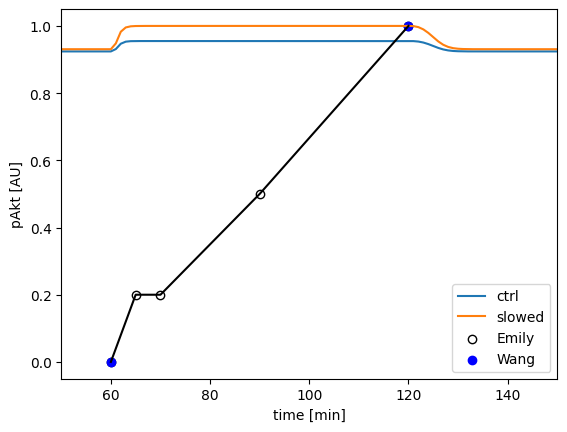

In [118]:
# get current data
path="pten/input/input_atp_data/"

# get current rate values
rates = tpkh.parse_rates(path+"/rates.csv")

# isolate rates of interest
paramNames = ['k3', "r3"] # contains ATP dependent term
paramNames = ['k5', 'r5']
# find indices of current rates
paramIdxs = []
for i,rate in enumerate(rates):
  for index, paramName in enumerate(paramNames):
    if rate.identifier == paramName:
      print("%s %f"%(
        rate.identifier,
        rate.value))
      paramIdxs.insert(index, i)

# stimuli to apply
amtsAtp=[1.]
amtsLps=[0.]

# assign new scaled rate values
rescaledValues = []
for iv in paramIdxs:
  rescaledValues.append(0 * rates[iv].value)
newParams={ paramName: rescaledValue for paramName, rescaledValue in zip(paramNames, rescaledValues) }
ranges=[[60,120]]

# generate simulation data
ctl = tpkh.runSim(tag = 'ctl',amtsAtp=amtsAtp,ranges=ranges,amtsLps=amtsLps, min_max=True, norm=False) # will use default parameters
exp  = tpkh.runSim(tag='cond',params=newParams,ranges=ranges,amtsAtp=amtsAtp,amtsLps=amtsLps, min_max=True, norm=False)

# extract data tracts
mean_dfCtl = pd.read_csv(ctl[0])
mean_dfExp = pd.read_csv(exp[0])
min_dfCtl = pd.read_csv(ctl[1])
min_dfExp = pd.read_csv(exp[1])
max_dfCtl = pd.read_csv(ctl[2])
max_dfExp = pd.read_csv(exp[2])

# normalize controls
mean_ctrl = normalize(np.asarray( mean_dfCtl['pAKT'] ))
min_ctrl = normalize(np.asarray( min_dfCtl['pAKT'] ))
max_ctrl = normalize(np.asarray( max_dfCtl['pAKT'] ))

# normalize experimental
mean_exp = normalize(np.asarray( mean_dfExp['pAKT'] ))
min_exp = normalize(np.asarray( min_dfExp['pAKT'] ))
max_exp = normalize(np.asarray( max_dfExp['pAKT'] ))

# plot means of the conditions
plt.plot(mean_ctrl,label='ctrl')
plt.plot(mean_exp,label='slowed')

# plot wet lab data
plt.scatter(wATP[:,1],wATP[:,0],facecolor='white',edgecolor='black',label='Emily')
plt.plot(wATP[:,1],wATP[:,0],'k-')
plt.scatter(wangATP[:,1],wangATP[:,0],facecolor='blue',label='Wang')

# set-up axes
plt.xlim([50,150])
plt.ylabel('pAkt [AU]')
plt.xlabel('time [min]')
plt.legend(loc=0)

Now that these have been simulated with two different parameter sets, we will plot the states (pAkt) of interest from the returned dataFrame objects

In [111]:
# load reuslts
#print(ctl,decrP2Y12)
# dfCtl = pd.read_csv(ctl[0])
# dfP2Y12 = pd.read_csv(exp[0])

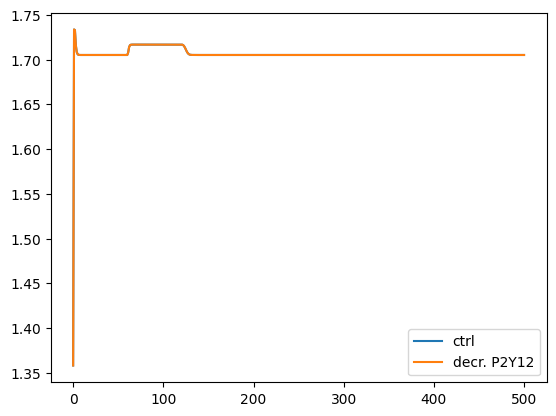

In [119]:
# P2Y12act
plt.plot(mean_dfCtl['pAKT'],label='ctrl')
plt.plot(mean_dfCtl['pAKT'],label='decr. P2Y12')
plt.legend(loc=0)

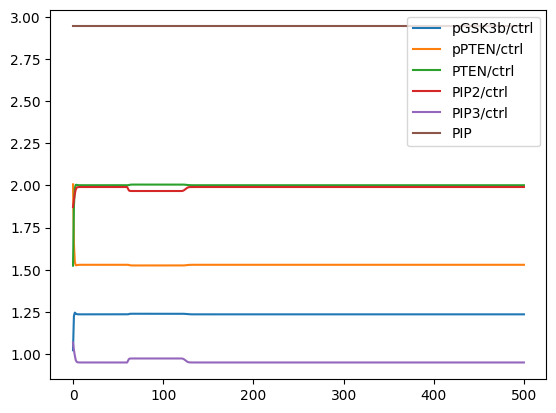

In [123]:
plt.plot(mean_dfCtl['pGSK3B'],label='pGSK3b/ctrl')
#plt.plot(dfP2Y12['pGSK3B'],label='pGSK3b/decr. P2Y12')
plt.plot(mean_dfCtl['pPTEN'],label='pPTEN/ctrl')
plt.plot(mean_dfCtl['PTEN'],label='PTEN/ctrl')
plt.plot(mean_dfCtl['PIP2'],label='PIP2/ctrl')
plt.plot(mean_dfCtl['PIP3'],label='PIP3/ctrl')
plt.plot(mean_dfCtl['PIP3'] + mean_dfCtl['PIP2'], label="PIP")
plt.legend(loc=0)

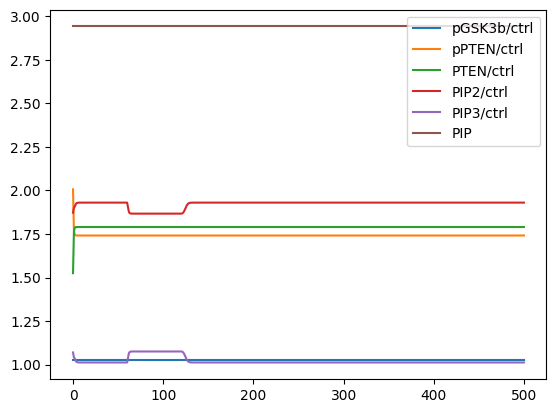

In [124]:
plt.plot(mean_dfExp['pGSK3B'],label='pGSK3b/ctrl')
#plt.plot(dfP2Y12['pGSK3B'],label='pGSK3b/decr. P2Y12')
plt.plot(mean_dfExp['pPTEN'],label='pPTEN/ctrl')
plt.plot(mean_dfExp['PTEN'],label='PTEN/ctrl')
plt.plot(mean_dfExp['PIP2'],label='PIP2/ctrl')
plt.plot(mean_dfExp['PIP3'],label='PIP3/ctrl')
plt.plot(mean_dfExp['PIP3'] + mean_dfExp['PIP2'], label="PIP")
plt.legend(loc=0)